In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

In [3]:
#loading the data
data=pd.read_csv('Index2018.csv')
data.head()
df=data.copy()
df.date=pd.to_datetime(df.date,dayfirst=True)
df.set_index("date",inplace=True)
df=df.asfreq('b')
df=df.fillna(method='ffill')

In [4]:
df['market_value']=df.spx

In [9]:
del df['spx'], df['dax'], df['ftse'], df['nikkei']
size=int(len(df)*0.8)
df_train =df.iloc[:size]
df_test=df.iloc[size:]


In [15]:
wn=np.random.normal(loc=df_train.market_value.mean(),scale=df_train.market_value.std(),size=len(df_train))

In [17]:
df_train['wn']= wn #try adding white noise to the dataframe,every value of this column will be assigned to a time period, since dataframe uses date as indicies

<ipython-input-17-99af2162b651>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['wn']= wn #try adding white noise to the dataframe,every value of this column will be assigned to a time period, since dataframe uses date as indicies


In [20]:
df_train.describe() #as,it is seen the two means are not entirely equal as white noise value generated are normally distributed around the mean of the S&P

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1093.484295
std,292.559287,294.568263
min,438.920000,18.280461
25%,914.620000,900.160160
50%,1144.650000,1093.084455
75%,1316.280729,1290.933171
max,1570.252238,2163.657688


Text(0.5, 1.0, 'white noise Time-series')

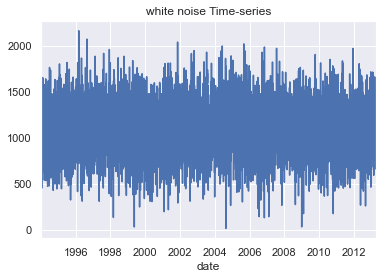

In [29]:
df_train.wn.plot()
plt.title("white noise Time-series") 

(0.0, 2300.0)

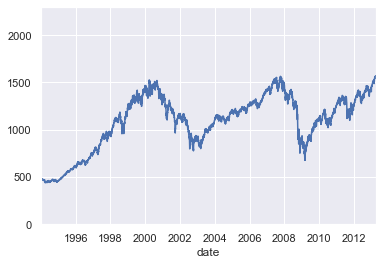

In [32]:
df_train.market_value.plot()
plt.ylim(0,2300) #resetting the y axis values